In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

Olaparib,1017,"PARP1, PARP2",Genome integrity


In [16]:
df_pathway = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
# # 对pathway_name进行去重，打印
df_pathway['pathway_class'].drop_duplicates()

0      Mitochondrial ROS formation
1       CYP-mediated ROS formation
2                    ERK signaling
3             DNA adduct formation
4       Nuclear receptor signaling
                  ...             
495                            NaN
512                Prostate cancer
524               Cushing syndrome
538           Basal cell carcinoma
554             Huntington disease
Name: pathway_class, Length: 108, dtype: object

In [17]:
# Axitinib Navitoclax Picolinici-acid Campthotecin BMS-754807 Afatinib Erlotinib Gefitinib
# EGFR
drug_name = 'Erlotinib' # 靶向药物 EGFR
cell_line = ['NCIH526','LU135','NCIH146','NCIH1963']
# target_pathway = ['EGFR tyrosine kinase inhibitor resistance','Non-small cell lung cancer','MAPK signaling pathway','PI3K signaling','Cell cycle','Apoptosis','Small cell lung cancer']
target_pathway = ['DNA replication']

In [18]:
df_pathways_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
# 筛选出drug = Oxaliplatin
df_pathways_att_single_drug = df_pathways_att[df_pathways_att['drug'] == drug_name]
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_pathways_att_single_drug = df_pathways_att_single_drug[df_pathways_att_single_drug['cell_line'].isin(cell_line)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(4, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
10646,Erlotinib,NCIH146,SCLC,0.001344,0.001662,0.001519,0.001615,0.001718,0.001561,0.001388,...,0.001519,0.001176,0.001436,0.001388,0.001387,0.001526,0.002463,0.001366,0.002165,0.001502
11703,Erlotinib,NCIH1963,SCLC,0.001348,0.001626,0.001522,0.001479,0.001705,0.001566,0.001391,...,0.001523,0.001264,0.001451,0.001413,0.001390,0.001511,0.002457,0.001288,0.002280,0.001508
11907,Erlotinib,NCIH526,SCLC,0.001351,0.001632,0.001524,0.001455,0.001721,0.001567,0.001394,...,0.001525,0.001361,0.001458,0.001391,0.001394,0.001523,0.002591,0.001250,0.001785,0.001515
12482,Erlotinib,LU135,SCLC,0.001348,0.001628,0.001523,0.001534,0.001716,0.001568,0.001392,...,0.001524,0.001439,0.001501,0.001485,0.001391,0.001690,0.002404,0.001285,0.002476,0.001518


In [19]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.001348
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001637
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001522
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.001521
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001715
dtype: float64

In [20]:
df_pathways_info_origin = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
0,0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,N01394,Env factor,Mitochondrial ROS formation
1,1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,N01401,Env factor,CYP-mediated ROS formation
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
3,3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,N01386,Env factor,DNA adduct formation
4,4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,N01364,Env factor,Nuclear receptor signaling


In [21]:
# 筛选出pathway_class是target_pathway的数据  二选一
df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_class'].isin(target_pathway)]
# 筛选出df_pathways_info中pathway_name包含EGFR或者ERBB2的数据
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].str.contains('EGFR|ERBB2')]
print(df_pathways_info.shape)
df_pathways_info.head()

(6, 5)


,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
210,210,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_LICENSING,N01468,Reference,DNA replication
211,211,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_TERMINA...,N01473,Reference,DNA replication
365,365,KEGG_MEDICUS_REFERENCE_OKAZAKI_FRAGMENT_MATURA...,N01472,Reference,DNA replication
368,368,KEGG_MEDICUS_REFERENCE_ORIGIN_UNWINDING_AND_EL...,N01471,Reference,DNA replication
383,383,KEGG_MEDICUS_REFERENCE_PRE_IC_FORMATION,N01470,Reference,DNA replication


In [22]:
# 筛选出pathway_class是target_pathway的数据  二选一
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].isin(target_pathway_detail)]
# print(df_pathways_info.shape)
# df_pathways_info.head()

In [23]:
df_gep = pd.read_csv('../../data/GeneExp_Wilcoxon_test_Analysis_Log10_P_value_C2_KEGG_MEDICUS.csv')
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
cell_line_sclc = ['NCIH526','LU135','NCIH146','NCIH1963']
#   
df_gep_sclc = df_gep[df_gep['cell_line'].isin(cell_line_sclc)]
# 从第二列开始取均值
df_gep_sclc_mean = df_gep_sclc.iloc[:, 1:].mean(axis=0)
df_gep_sclc_mean = df_gep_sclc_mean.reset_index()
df_gep_sclc_mean.columns = ['pathway_name', 'score']
df_gep_sclc_mean.head()

,pathway_name,score
0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,4.426231
1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,0.295626
2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,2.175265
3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,0.343319
4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,0.257617


In [24]:
cell_line_nsclc = ['EKVX','HCC827','LCLC103H','NCIH1299','NCIH2170','NCIH2228','PC14','RERFLCSQ1']
df_gep_nsclc = df_gep[df_gep['cell_line'].isin(cell_line_nsclc)]
df_gep_nsclc_mean = df_gep_nsclc.iloc[:, 1:].mean(axis=0)
df_gep_nsclc_mean = df_gep_nsclc_mean.reset_index()
df_gep_nsclc_mean.columns = ['pathway_name', 'score']
df_gep_nsclc_mean.head()

,pathway_name,score
0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,4.465865
1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,0.974407
2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,2.089772
3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,0.556480
4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,1.078312


In [25]:
df_pathway = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv',index_col=0)

# 将df_pathways_single_drug_mean与df_pathways_info合并
df_gep_with_pathways_info = pd.merge(df_gep_sclc_mean, df_pathway, on='pathway_name')
df_gep_with_pathways_info.head()

,pathway_name,score,pathway_id,pathway_type,pathway_class
0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,4.426231,N01394,Env factor,Mitochondrial ROS formation
1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,0.295626,N01401,Env factor,CYP-mediated ROS formation
2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,2.175265,N01352,Env factor,ERK signaling
3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,0.343319,N01386,Env factor,DNA adduct formation
4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,0.257617,N01364,Env factor,Nuclear receptor signaling


In [26]:
# 从df_gep_mean取出DNA_replication的数据
df_gep_sclc_mean_DNA_replication = df_gep_sclc_mean[df_gep_sclc_mean['pathway_name'].isin(df_pathways_info['pathway_name'])]
df_gep_sclc_mean_without_DNA_replication = df_gep_sclc_mean[~df_gep_sclc_mean['pathway_name'].isin(df_pathways_info['pathway_name'])]
# 两个数据合并，新增一列属性type，DNA_replication的type为Target pathways，其余为Without Target pathways
df_gep_sclc_mean_DNA_replication['type'] = 'DNA_replication'
df_gep_sclc_mean_without_DNA_replication['type'] = 'Others'
df_melt = pd.concat([df_gep_sclc_mean_DNA_replication, df_gep_sclc_mean_without_DNA_replication])
df_melt.head()

C:\Users\query\AppData\Local\Temp\ipykernel_47912\1576476556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gep_sclc_mean_DNA_replication['type'] = 'DNA_replication'
C:\Users\query\AppData\Local\Temp\ipykernel_47912\1576476556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gep_sclc_mean_without_DNA_replication['type'] = 'Others'


,pathway_name,score,type
210,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_LICENSING,6.886392,DNA_replication
211,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_TERMINA...,8.516627,DNA_replication
365,KEGG_MEDICUS_REFERENCE_OKAZAKI_FRAGMENT_MATURA...,4.168676,DNA_replication
368,KEGG_MEDICUS_REFERENCE_ORIGIN_UNWINDING_AND_EL...,10.795033,DNA_replication
383,KEGG_MEDICUS_REFERENCE_PRE_IC_FORMATION,7.579865,DNA_replication


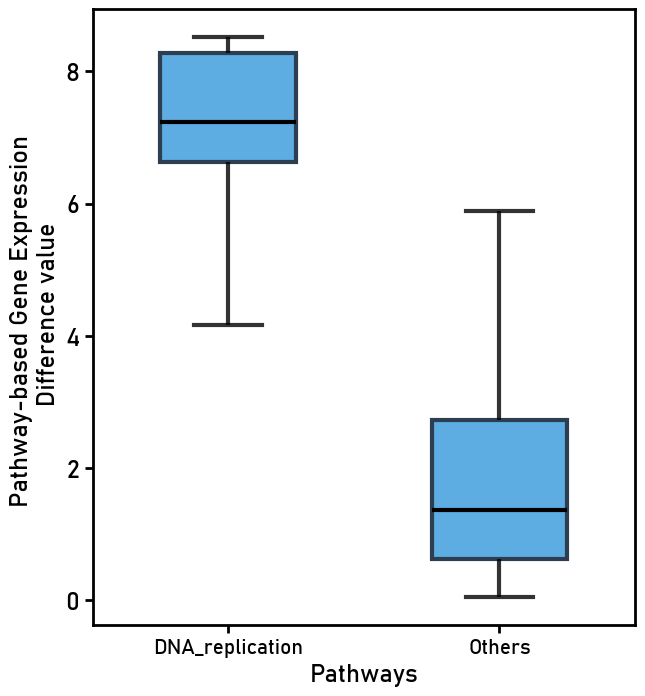

In [27]:
import seaborn as sns
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 8))
# 绘制箱线图,并自定义样式
box_props = dict(facecolor='#5DADE2', edgecolor='#2C3E50', linewidth=3,) # 设置箱体边框颜色和线宽
whisker_props = dict(color='k', linestyle='-', linewidth=3,alpha=0.8) # 设置whisker线条颜色、样式和线宽
cap_props = dict(color='k', linewidth=3,alpha=0.8)  # 设置上方横线的颜色和线宽
median_props = dict(color='k', linewidth=3) # 设置中位数线条颜色和线宽
ax = sns.boxplot(x='type', y='score', data=df_melt,linewidth=3, 
                 boxprops=box_props, whiskerprops=whisker_props, medianprops=median_props,
                 showfliers=False, width=0.5,capprops=cap_props,)

# plt.title('MSE of Different Genomic Data', fontsize=25)
plt.ylabel('Pathway-based Gene Expression \n '
           'Difference value', fontsize=18)
plt.xlabel('Pathways', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=18)
# 去除上和右边框
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# 去除下方的刻度
# plt.gca().xaxis.set_ticks_position('none')
# 加粗横纵坐标
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
# 刻度加粗
plt.gca().tick_params(width=2, length=6)

plt.savefig('DNA_replication_Pathways_In_SCLC.png', dpi=300)
plt.show()

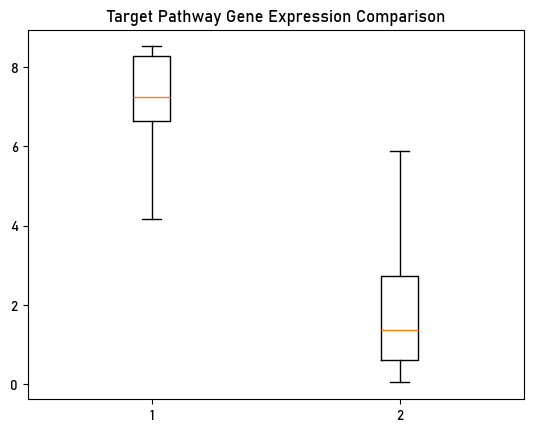

In [14]:

# 画出两个数据的箱线图，去掉异常值，算出两个数据的p值
plt.boxplot([df_gep_sclc_mean_DNA_replication['score'], df_gep_sclc_mean_without_DNA_replication['score']], showfliers=False)
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

In [11]:
# Wilcoxon rank-sum test
from scipy.stats import ranksums
ranksums(df_gep_sclc_mean_DNA_replication['score'], df_gep_sclc_mean_without_DNA_replication['score'])

RanksumsResult(statistic=3.769002966372144, pvalue=0.00016390094005914286)

In [12]:
df_gep_nsclc_mean_DNA_replication = df_gep_nsclc_mean[
    df_gep_nsclc_mean['pathway_name'].isin(df_pathways_info['pathway_name'])]
df_gep_nsclc_mean_without_DNA_replication = df_gep_nsclc_mean[
    ~df_gep_nsclc_mean['pathway_name'].isin(df_pathways_info['pathway_name'])]
df_gep_nsclc_mean_DNA_replication['type'] = 'DNA_replication'
df_gep_nsclc_mean_without_DNA_replication['type'] = 'Others'
df_melt_nsclc = pd.concat([df_gep_nsclc_mean_DNA_replication, df_gep_nsclc_mean_without_DNA_replication])
df_melt_nsclc.head()

C:\Users\query\AppData\Local\Temp\ipykernel_36064\1465048093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gep_nsclc_mean_DNA_replication['type'] = 'DNA_replication'
C:\Users\query\AppData\Local\Temp\ipykernel_36064\1465048093.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gep_nsclc_mean_without_DNA_replication['type'] = 'Others'


,pathway_name,score,type
210,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_LICENSING,4.613220,DNA_replication
211,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_TERMINA...,7.010537,DNA_replication
365,KEGG_MEDICUS_REFERENCE_OKAZAKI_FRAGMENT_MATURA...,3.667115,DNA_replication
368,KEGG_MEDICUS_REFERENCE_ORIGIN_UNWINDING_AND_EL...,7.727563,DNA_replication
383,KEGG_MEDICUS_REFERENCE_PRE_IC_FORMATION,5.819497,DNA_replication


In [32]:
# 将df_gep_nsclc_mean_DNA_replication 和 df_gep_sclc_mean_without_DNA_replication 合并，新增属性cell_line
df_gep_nsclc_mean_DNA_replication['cell_line'] = 'NSCLC'
df_gep_sclc_mean_DNA_replication['cell_line'] = 'SCLC'
df_melt_lung = pd.concat([df_gep_nsclc_mean_DNA_replication, df_gep_sclc_mean_DNA_replication])
print(df_melt_lung.shape)
df_melt_lung.head()

(12, 4)


C:\Users\query\AppData\Local\Temp\ipykernel_36064\3551428504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gep_nsclc_mean_DNA_replication['cell_line'] = 'NSCLC'
C:\Users\query\AppData\Local\Temp\ipykernel_36064\3551428504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gep_sclc_mean_DNA_replication['cell_line'] = 'SCLC'


,pathway_name,score,type,cell_line
210,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_LICENSING,4.613220,DNA_replication,NSCLC
211,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_TERMINA...,7.010537,DNA_replication,NSCLC
365,KEGG_MEDICUS_REFERENCE_OKAZAKI_FRAGMENT_MATURA...,3.667115,DNA_replication,NSCLC
368,KEGG_MEDICUS_REFERENCE_ORIGIN_UNWINDING_AND_EL...,7.727563,DNA_replication,NSCLC
383,KEGG_MEDICUS_REFERENCE_PRE_IC_FORMATION,5.819497,DNA_replication,NSCLC


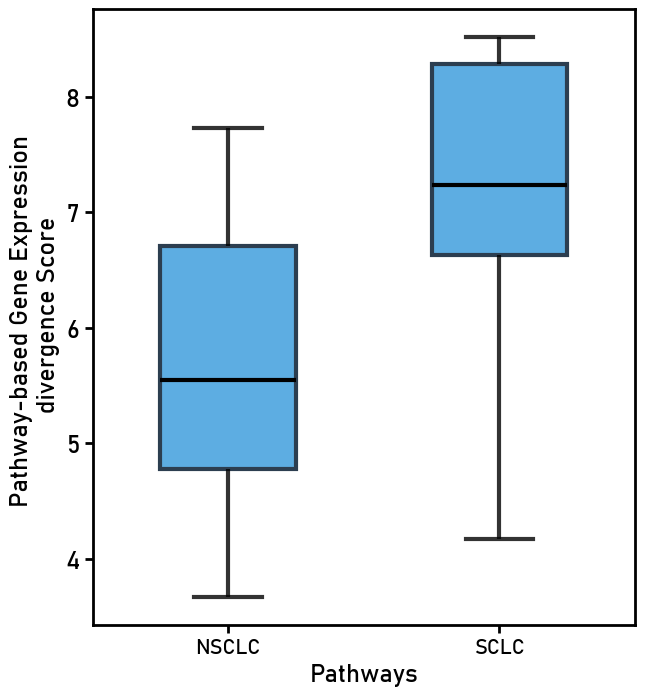

In [33]:
import seaborn as sns
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 8))
# 绘制箱线图,并自定义样式
box_props = dict(facecolor='#5DADE2', edgecolor='#2C3E50', linewidth=3,) # 设置箱体边框颜色和线宽
whisker_props = dict(color='k', linestyle='-', linewidth=3,alpha=0.8) # 设置whisker线条颜色、样式和线宽
cap_props = dict(color='k', linewidth=3,alpha=0.8)  # 设置上方横线的颜色和线宽
median_props = dict(color='k', linewidth=3) # 设置中位数线条颜色和线宽
ax = sns.boxplot(x='cell_line', y='score', data=df_melt_lung,linewidth=3, 
                 boxprops=box_props, whiskerprops=whisker_props, medianprops=median_props,
                 showfliers=False, width=0.5,capprops=cap_props,)

# plt.title('MSE of Different Genomic Data', fontsize=25)
plt.ylabel('Pathway-based Gene Expression \n '
           'divergence Score', fontsize=18)
plt.xlabel('Pathways', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=18)
# 去除上和右边框
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# 去除下方的刻度
# plt.gca().xaxis.set_ticks_position('none')
# 加粗横纵坐标
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
# 刻度加粗
plt.gca().tick_params(width=2, length=6)

# plt.savefig('DNA_replication_Pathways_In_SCLC.png', dpi=300)
plt.show()

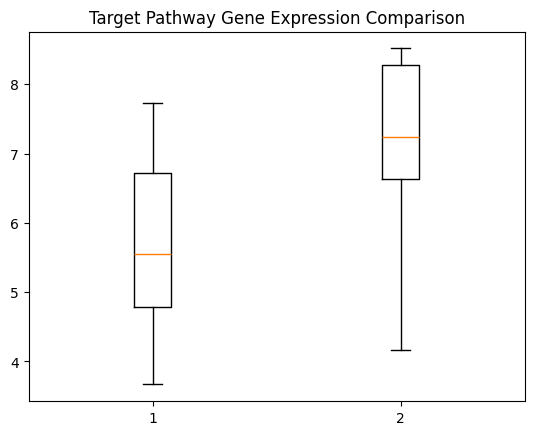

In [14]:
# 画出两个数据的箱线图，去掉异常值，算出两个数据的p值
plt.boxplot([df_gep_nsclc_mean_DNA_replication['score'], df_gep_sclc_mean_DNA_replication['score']], showfliers=False)
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

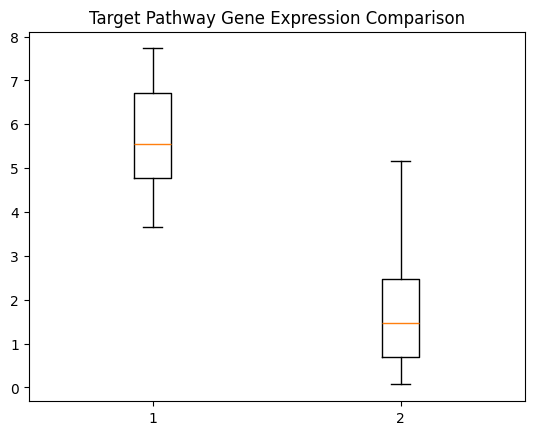

In [15]:
# 画出两个数据的箱线图，去掉异常值，算出两个数据的p值
plt.boxplot([df_gep_nsclc_mean_DNA_replication['score'], df_gep_nsclc_mean_without_DNA_replication['score']], showfliers=False)
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

In [30]:
# Wilcoxon rank-sum test
from scipy.stats import ranksums
ranksums(df_gep_nsclc_mean_DNA_replication['score'], df_gep_sclc_mean_DNA_replication['score'])

RanksumsResult(statistic=-1.281025230440697, pvalue=0.2001848041775791)

In [31]:
# 使用t检验
from scipy.stats import ttest_ind
ttest_ind(df_gep_nsclc_mean_DNA_replication['score'], df_gep_sclc_mean_DNA_replication['score'])

TtestResult(statistic=-1.5875343199938714, pvalue=0.14347537047438616, df=10.0)

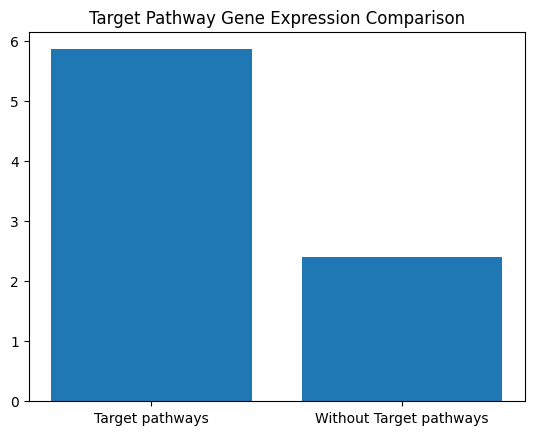

In [127]:
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_gep_sclc_mean_DNA_replication['score'].mean(), df_gep_sclc_mean_without_DNA_replication['score'].mean()])
#title
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

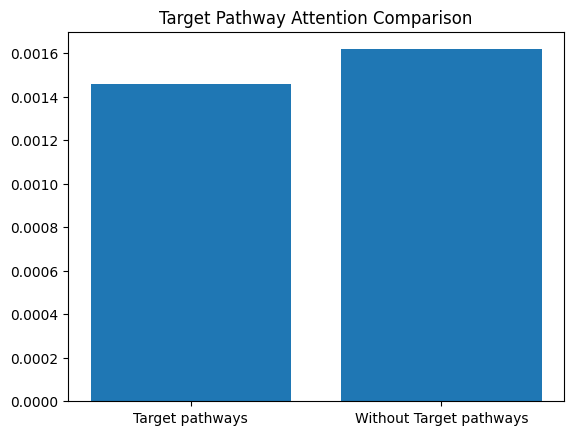

In [128]:
DNA_replication_pathways = df_pathways_info['pathway_name']
# 从df_pathways_att_oxaliplatin_mean取出DNA_replication_pathways的数据
df_pathways_att_oxaliplatin_mean_DNA_replication = df_pathways_single_drug_mean[df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
df_pathways_att_mean_without_DNA_replication = df_pathways_single_drug_mean[~df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_pathways_att_oxaliplatin_mean_DNA_replication.mean(), df_pathways_att_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Attention Comparison')
plt.show()

In [129]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [130]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
457,0.002637,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION
389,0.002637,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...
526,0.002636,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_GRM1_T...
288,0.002636,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
153,0.002635,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...


In [131]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head()

(10, 6)


,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.001565,KEGG_MEDICUS_REFERENCE_PRE_IC_FORMATION,383,N01470,Reference,DNA replication
1,0.001523,KEGG_MEDICUS_REFERENCE_ORIGIN_UNWINDING_AND_EL...,368,N01471,Reference,DNA replication
2,0.001523,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_TERMINA...,211,N01473,Reference,DNA replication
3,0.001523,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_LICENSING,210,N01468,Reference,DNA replication
4,0.001497,KEGG_MEDICUS_REFERENCE_BASE_EXCISION_AND_STRAN...,140,N01435,Reference,Base excision repair


In [132]:
# 将df_pathways_single_drug_mean中pathway_name列存在在DNA_replication_pathways中，颜色标注为红色，其余为蓝色
df_pathways_single_drug_mean['color'] = np.where(df_pathways_single_drug_mean['pathway_name'].isin(DNA_replication_pathways), 'r', 'b')
# 重置索引
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
df_pathways_single_drug_mean.head(50)

,attention,pathway_name,color
0,0.002637,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION,b
1,0.002637,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b
2,0.002636,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_GRM1_T...,b
3,0.002636,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b
4,0.002635,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,b
5,0.002634,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,b
6,0.002634,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTR...,b
7,0.002631,KEGG_MEDICUS_REFERENCE_BETA_OXIDATION_ACYL_COA...,b
8,0.002630,KEGG_MEDICUS_REFERENCE_NOTCH_SIGNALING_PATHWAY,b
9,0.002628,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b


中值: 0.001522004


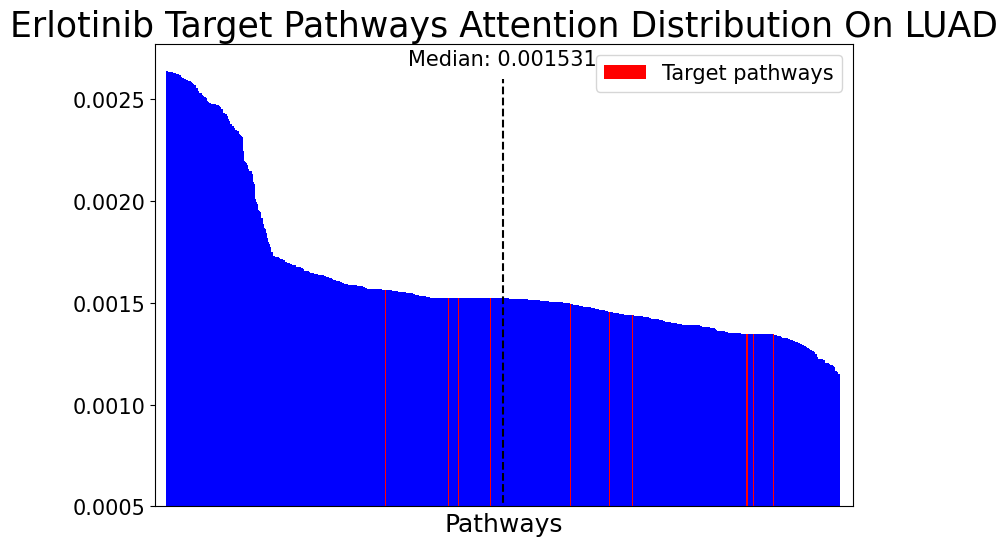

In [133]:
# 设置画布大小
plt.figure(figsize=(9, 6))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean['pathway_name'], df_pathways_single_drug_mean['attention'], color=df_pathways_single_drug_mean['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
plt.vlines(309, 0, 0.0026, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
plt.text(309, 0.00265, 'Median: 0.001531', ha='center', va='bottom', fontsize=15)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='r', label='Target pathways')
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend(fontsize=15)
# 打印出中值
print('中值:',df_pathways_single_drug_mean['attention'].median())
plt.title(drug_name + ' Target Pathways Attention Distribution On LUAD', fontsize=25)
plt.xticks([])
plt.yticks(fontsize=15)
plt.ylim(bottom=0.0005)
plt.xlim(left=-10, right=630)
plt.xlabel('Pathways', fontsize=18)
# 保存图片
plt.savefig(drug_name + '_NSCLC_Target_Pathway_Attention_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [134]:
# 帮我找出所有color为r的index
target_pathways = df_pathways_single_drug_mean[df_pathways_single_drug_mean['color'] == 'r']
# 将每个index除以618，得到比例
p = (target_pathways.index+1) / 619
print('所占百分比:',p)

所占百分比: Index([ 0.3263327948303716,   0.420032310177706,  0.4345718901453958,
       0.48303715670436187,  0.6009693053311793,  0.6591276252019386,
        0.6930533117932148,  0.8626817447495961,  0.8723747980613893,
         0.901453957996769],
      dtype='float64')


In [135]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head(100)

(10, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.001565,KEGG_MEDICUS_REFERENCE_PRE_IC_FORMATION,r,383,N01470,Reference,DNA replication
1,0.001523,KEGG_MEDICUS_REFERENCE_ORIGIN_UNWINDING_AND_EL...,r,368,N01471,Reference,DNA replication
2,0.001523,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_TERMINA...,r,211,N01473,Reference,DNA replication
3,0.001523,KEGG_MEDICUS_REFERENCE_DNA_REPLICATION_LICENSING,r,210,N01468,Reference,DNA replication
4,0.001497,KEGG_MEDICUS_REFERENCE_BASE_EXCISION_AND_STRAN...,r,140,N01435,Reference,Base excision repair
5,0.001457,KEGG_MEDICUS_REFERENCE_TRAIP_DEPENDENT_REPLISO...,r,444,N01474,Reference,DNA replication
6,0.001439,KEGG_MEDICUS_REFERENCE_BASE_EXCISION_AND_STRAN...,r,139,N01433,Reference,Base excision repair
7,0.001348,KEGG_MEDICUS_REFERENCE_OKAZAKI_FRAGMENT_MATURA...,r,365,N01472,Reference,DNA replication
8,0.001348,KEGG_MEDICUS_REFERENCE_LONG_PATCH_BER,r,322,N01436,Reference,Base excision repair
9,0.001346,KEGG_MEDICUS_REFERENCE_BASE_EXCISION_AND_STRAN...,r,138,N01434,Reference,Base excision repair


In [136]:
# 将df_pathways_single_drug_mean与df_pathways_info_origin合并
df_pathways_single_drug_mean_merge_origin = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge_origin.shape)
df_pathways_single_drug_mean_merge_origin.head(200)

(619, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002637,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION,b,457,N00708,Reference,Phenylalanine and tyrosine metabolism
1,0.002637,KEGG_MEDICUS_REFERENCE_PURINE_SALVAGE_PATHWAY_...,b,389,N01421,Reference,Purine salvage pathway
2,0.002636,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_GRM1_T...,b,526,N00954,Variant,Spinocerebellar ataxia
3,0.002636,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria)
4,0.002635,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,b,153,N01461,Reference,TGFB signaling
...,...,...,...,...,...,...,...
195,0.001567,KEGG_MEDICUS_REFERENCE_RTK_PLCG_ITPR_SIGNALING...,b,412,N01641,Reference,Calcium signaling
196,0.001566,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,b,572,N01031,Variant,Parkinson disease
197,0.001566,KEGG_MEDICUS_REFERENCE_E2_ER_RAS_ERK_SIGNALING...,b,216,N01351,Reference,ERK signaling
198,0.001566,KEGG_MEDICUS_VARIANT_HRAS_OVEREXPRESSION_TO_ER...,b,509,N00077,Variant,Bladder cancer
